In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request

<ipython-input-2-37777429a894>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
cities = [
    "boston",
    "new-york",
    "san-diego",
    "san-francisco",
    "chicago",
    "pittsburgh",
    #"baltimore",
    #"portland",
    "houston",
]

In [21]:
all_dfs = []
for city in ["us-average"]+ cities:
    city_df = pd.read_csv(DATA_DIR / "CPI" / "{}-all-items.csv".format(city))
    city_df["CITY"] = city
    city_df["CPI"] = city_df["Value"]
    all_dfs.append(city_df)
CPI_all_df_stacked = pd.concat(all_dfs)
CPI_all_df = (
    CPI_all_df_stacked[["Year", "CPI", "CITY"]]
    .groupby(["Year", "CITY"])
    .describe()[["CPI"]]["CPI"]["mean"]
)
CPI_all_df = pd.DataFrame(CPI_all_df).reset_index()
CPI_all_df = CPI_all_df.pivot(index="Year", columns="CITY", values="mean")
CPI_all_df[:3]

CITY,boston,chicago,houston,new-york,pittsburgh,san-diego,san-francisco,us-average
Year,,,,,,,,
1984,104.70,103.80,102.70,104.80,104.55,104.75,104.00,103.883333
1985,109.40,107.75,104.90,108.70,106.90,110.35,108.35,107.566667
1986,112.25,110.00,103.95,112.25,108.25,113.50,111.65,109.608333


In [22]:
CPI_all_df

CITY,boston,chicago,houston,new-york,pittsburgh,san-diego,san-francisco,us-average
Year,,,,,,,,
1984,104.7000,103.8000,102.7000,104.8000,104.5500,104.7500,104.0000,103.883333
1985,109.4000,107.7500,104.9000,108.7000,106.9000,110.3500,108.3500,107.566667
1986,112.2500,110.0000,103.9500,112.2500,108.2500,113.5000,111.6500,109.608333
1987,117.1500,114.4500,106.5000,117.9500,111.4000,117.4500,115.4000,113.625000
1988,124.1500,119.0000,109.5500,123.7000,114.9000,123.4500,120.5000,118.258333
1989,131.2500,125.0000,114.1000,130.6000,120.1000,130.6000,126.3500,123.966667
1990,138.9000,131.7000,120.6000,138.5500,126.2000,138.4000,132.0500,130.658333
1991,144.9500,137.0500,125.1500,144.8000,131.3500,143.4500,137.9500,136.191667
1992,148.6000,141.0500,129.1000,150.0500,135.9500,147.3500,142.5000,140.316667


In [23]:
CPI_all_df_stacked[:3]

,Series ID,Year,Period,Label,Value,CITY,CPI
0,CUUR0000SA0,1984,M01,1984 Jan,101.9,us-average,101.9
1,CUUR0000SA0,1984,M02,1984 Feb,102.4,us-average,102.4
2,CUUR0000SA0,1984,M03,1984 Mar,102.6,us-average,102.6


In [24]:
CPI_relative_average = pd.DataFrame(CPI_all_df.values.T / CPI_all_df['us-average'].values).T
CPI_relative_average.columns = CPI_all_df.columns
CPI_relative_average.index = CPI_all_df.index
CPI_relative_average= CPI_relative_average.reset_index()
CPI_relative_average[:3]

CITY,Year,boston,chicago,houston,new-york,pittsburgh,san-diego,san-francisco,us-average
0,1984,1.007861,0.999198,0.988609,1.008824,1.006417,1.008343,1.001123,1.0
1,1985,1.017044,1.001704,0.975209,1.010536,0.993802,1.025875,1.007282,1.0
2,1986,1.024101,1.003573,0.948377,1.024101,0.987607,1.035505,1.018627,1.0


In [25]:
CPI_all_df = CPI_all_df.reset_index()

In [26]:
import seaborn as sns

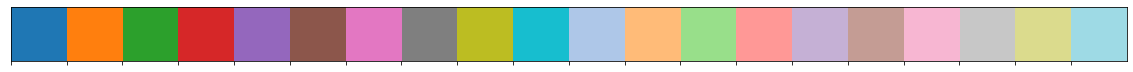

In [27]:
colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000']
colors = sns.color_palette('tab20', 20)[::2] + sns.color_palette('tab20', 20)[1::2]
sns.palplot(colors)

In [28]:
city_color_dict = {'boston': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'new-york': (1.0, 0.4980392156862745, 0.054901960784313725),
 'san-diego': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'san-francisco': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392),
 'chicago': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'pittsburgh': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'baltimore': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'portland': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'houston': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)}

In [29]:
from postdocsalary.paths import save_fig, FIGURE_DIR

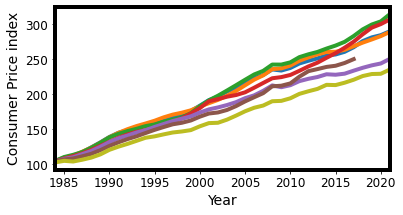

In [30]:
fig, ax = plt.subplots(figsize=(6, 3))
for city in cities:
    ax.plot(
        CPI_all_df.Year.values,
        CPI_all_df[city].values,
        label=city,
        lw=4,
        color = city_color_dict[city],
    )
#ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Consumer Price index", fontsize=14)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlim([1984, 2021])
save_fig(FIGURE_DIR / 'CPI')

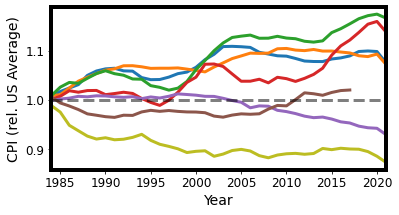

In [31]:
fig, ax = plt.subplots(figsize=(6, 3))
for city in cities:
    ax.plot(
        CPI_relative_average.Year.values,
        CPI_relative_average[city].values,
        label=city,
        lw=3,
        alpha = 1,
        color = city_color_dict[city],
    )
#ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("CPI (rel. US Average)", fontsize=14)
ax.set_xlim([1984, 2021])

ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.axhline(1, ls = 'dashed', lw=3, alpha = 0.5, color = 'k')
save_fig(FIGURE_DIR / 'CPI_rel_avg')